To create a K-Means Algorithm

Randomly chose k examples as initial centroids
while true:
create k clusters by assigning each
example to closest centroid
compute k new centroids by averaging examples in each cluster
if centroids don't change:
break
"""

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy

# Create a dataset
dataset = pd.DataFrame({
    'X': [12, 20, 22,23,28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'Y': [39, 36, 30,32,30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})


In [ ]:
np.random.seed(14)
k = 3

centroids = {
    i + 1: [np.random.randint(0, 80), np.random.randint(0, 80)] for i in range(k)
}

# Plot the dataset and initial centroids
plt.figure(figsize=(7, 7))
plt.scatter(dataset["X"], dataset["Y"], c="k")
colmap = {1: "r", 2: "b", 3: "g"}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [ ]:
def assignment(dataset, centroids): #calculates Euclidean distance between each data point and the centroids.
    for i in centroids.keys():
        dataset["distance_from_{}".format(i)] = np.sqrt(
            (dataset["X"] - centroids[i][0]) ** 2
            + (dataset["Y"] - centroids[i][1]) ** 2
        )
    centroid_distance_cols = ["distance_from_{}".format(i) for i in centroids.keys()]
    dataset["closest"] = dataset.loc[:, centroid_distance_cols].idxmin(axis=1)
    dataset["closest"] = dataset["closest"].map(
        lambda x: int(x.lstrip("distance_from_"))
    )
    return dataset
dataset = assignment(dataset, centroids)
print(dataset.head())

In [ ]:
def update(centroids, df):
    old_centroids = copy.deepcopy(centroids)
    
    for i in centroids.keys():
        centroids[i][0] = np.mean(dataset[dataset['closest'] == i]['X'])
        centroids[i][1] = np.mean(dataset[dataset['closest'] == i]['Y'])
    
    return centroids
updated_centroids = update(centroids, dataset)
plt.figure(figsize=(7, 7))
plt.scatter(dataset["X"], dataset["Y"], c="k")
for i in updated_centroids.keys():
    plt.scatter(*updated_centroids[i], color=colmap[i], marker="x", s=100)
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [ ]:
# Continue until all assigned categories dont change anymore
while True:
    closest_centroids = dataset['closest'].copy(deep=True)
    centroids = update(centroids, dataset)
    dataset = assignment(dataset, centroids)
    if closest_centroids.equals(dataset['closest']):
        break

# Plot the final clusters and centroids
fig = plt.figure(figsize=(7, 7))
plt.scatter(dataset['X'], dataset['Y'], color=dataset['closest'].map(colmap), alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

More precise Method

- np.random.choice(len(X), k, replace=False) randomly selects k unique indices from the range of indices [0, len(X)-1] without replacement. This means that each selected index will correspond to a distinct data point in the input matrix.

- The selected indices are stored in the random_indices variable.
X[random_indices] retrieves the data points from the input matrix X corresponding to the randomly selected indices. These data points will serve as the initial centroids.

In [ ]:
def initialize_centroids(X, k):
    random_indices = np.random.choice(len(X), k, replace=False)
    centroids = X[random_indices]
    return centroids

In [31]:
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=-1)
    cluster_labels = np.argmin(distances, axis=1)
    return cluster_labels

In [32]:
def update_centroids(X, cluster_labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(X[cluster_labels == i], axis=0)
    return centroids

In [33]:
def k_means(X, k, num_iterations=100):
    centroids = initialize_centroids(X, k)
    for _ in range(num_iterations):
        cluster_labels = assign_clusters(X, centroids)
        centroids = update_centroids(X, cluster_labels, k)
    return cluster_labels, centroids

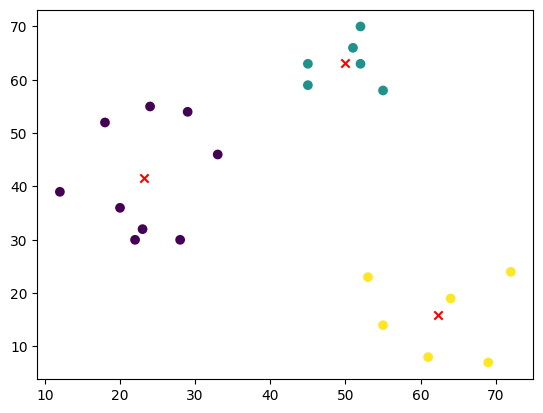

In [39]:
from sklearn.datasets import make_blobs
#X, _ = make_blobs(n_samples=200, centers=3, random_state=0)
X=dataset.values
# Apply k-means clustering
k = 3
cluster_labels, centroids = k_means(X, k)

# Plot the data points and centroids
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.show()